## Exercise session 3: Forcasting with non-linear models

We will continue our industrial production forecasting exercise, but now we will include more flexibel models into our toolkit.

## Import the required modules

There are the basic imports, but feel free to add anything you my need.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Read the data
Remember that the data can be found on 
https://raw.githubusercontent.com/barcelonagse-datascience/academic_datasets/main/fredmd_transformed.csv

In [5]:
dt = pd.read_csv('https://raw.githubusercontent.com/barcelonagse-datascience/academic_datasets/main/fredmd_transformed.csv')

dt.head()

,dates,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,...,0.000666,-0.001124,0.000262,-0.000022,-0.008147,0.004819,0.004929,0.004138,-0.014792,19.311543
1,1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,...,-0.000229,0.001349,0.001752,-0.000022,0.012203,-0.004890,0.012134,0.006734,0.024929,19.311543
2,1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,...,0.000646,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,0.002828,0.002020,-0.015342,19.311543
3,1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001144,0.007034,0.007126,-0.004768,...,0.000329,0.003316,0.002093,-0.004619,0.003992,0.004796,0.009726,0.009007,-0.012252,19.311543
4,1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008247,0.013056,...,-0.001521,-0.001238,-0.000100,0.000000,-0.004040,-0.004796,-0.004631,-0.001000,0.029341,19.311543


Next, lets set the date to be the index.


In [6]:
dt.set_index('dates', inplace = True)
dt.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
dates,,,,,,,,,,,,,,,,,,,,,
1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,...,0.000666,-0.001124,0.000262,-0.000022,-0.008147,0.004819,0.004929,0.004138,-0.014792,19.311543
1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,...,-0.000229,0.001349,0.001752,-0.000022,0.012203,-0.004890,0.012134,0.006734,0.024929,19.311543
1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,...,0.000646,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,0.002828,0.002020,-0.015342,19.311543
1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,...,0.000329,0.003316,0.002093,-0.004619,0.003992,0.004796,0.009726,0.009007,-0.012252,19.311543
1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008247,0.013056,0.019613,...,-0.001521,-0.001238,-0.000100,0.000000,-0.004040,-0.004796,-0.004631,-0.001000,0.029341,19.311543


Scale all columns of the dataset to have mean 0 and variance 1.
_hint_: you may use `import sklearn.preprocessing`

In [7]:
import sklearn.preprocessing
sklearn.preprocessing.scale(dt, copy = False)
dt.describe()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
count,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,...,7.560000e+02,7.560000e+02,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02
mean,-1.174839e-17,6.579099e-17,2.819614e-17,-4.699357e-18,-1.409807e-17,-2.819614e-17,-2.819614e-17,-9.398713e-18,-1.879743e-17,1.174839e-17,...,-5.580486e-18,1.116097e-17,0.000000,7.930164e-18,-1.468549e-19,-5.139921e-18,2.937098e-18,8.077019e-18,-2.643388e-17,-6.579099e-17
std,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,...,1.000662e+00,1.000662e+00,1.000662,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00
min,-1.242462e+01,-1.028163e+01,-1.549383e+01,-9.843525e+00,-1.073914e+01,-1.460038e+01,-1.563609e+01,-1.523883e+01,-1.167044e+01,-1.462878e+01,...,-4.340731e+00,-6.232716e+00,-5.904988,-7.396798e+00,-7.533595e+00,-5.659297e+00,-7.378700e+00,-1.309921e+01,-7.485062e+00,-1.414470e+00
25%,-1.632271e-01,-3.595907e-01,-3.139022e-01,-4.824972e-01,-3.706509e-01,-3.729558e-01,-4.249124e-01,-4.128702e-01,-4.586841e-01,-3.179502e-01,...,-5.374330e-01,-4.393429e-01,-0.523145,-5.477844e-01,-3.829426e-01,-5.045325e-01,-2.922384e-01,-2.086809e-01,-5.459749e-01,-7.034632e-01
50%,1.256528e-02,7.221165e-02,-1.164952e-03,-6.722099e-03,5.081663e-03,4.921314e-02,4.765765e-02,2.349049e-02,2.576197e-02,1.645651e-02,...,-1.503014e-03,7.905672e-03,-0.050272,-3.094968e-03,-2.777845e-03,-1.257342e-03,2.131623e-02,2.979170e-02,3.746222e-02,-1.833793e-01
75%,1.794693e-01,4.101448e-01,3.653208e-01,5.033178e-01,3.827306e-01,4.466236e-01,4.656015e-01,4.699518e-01,4.827687e-01,3.406371e-01,...,5.464641e-01,4.836568e-01,0.490176,5.006779e-01,3.861573e-01,4.482282e-01,2.869060e-01,2.472941e-01,5.585715e-01,4.293951e-01
max,1.496211e+01,6.150492e+00,9.189616e+00,5.896904e+00,1.052245e+01,5.726670e+00,6.446423e+00,7.070150e+00,7.093082e+00,9.693228e+00,...,5.174846e+00,4.609044e+00,9.988570,4.838749e+00,5.870688e+00,5.231250e+00,7.855875e+00,1.302253e+01,4.636349e+00,6.283231e+00


Create a variable called `IS` to hold a boolean mask for the InSample data.  Then, define `dt_train` and `dt_test`, as the insample (training) and out-of-sample (testing) versions of our dataset. We define as insample everything up to 1999-12-01, so that our first forecast is for 2000-01-01.

In [8]:
IS = dt.index > '1999-12-01'
dt_train = dt.loc[~IS, :]
dt_test = dt.loc[IS, :]


**Remember**: our forecasting model should be a function of the past! 
$$ \hat{y}_{t+1} = f(\bf{x}_{t})$$
Keeping this observation in mind and using `dt_train` and `dt_test`, construct the variables `y_train`, `y_test`, `X_train` and `X_test`.
Remember that our goal is to forecast Industrial Production (INDPRO).
_hint_: you may want to use `.iloc`.

In [9]:
X_train = dt_train.iloc[ :-1]
y_train = dt_train['INDPRO'].iloc[1: ]

X_test = dt_test.iloc[ :-1]
y_test = dt_test['INDPRO'].iloc[1: ]

If everything is good, the output of
```python
X_train.index[0] , y_train.index[0], X_test.index[0], y_test.index[0]
```
should be
```python
('1959-03-01', '1959-04-01', '1999-12-01', '2000-01-01')
```
highlighting that we are using information from 1999-12-01 to forecast 2000-01-01.

In [10]:
X_train.index[0], y_train.index[0], X_test.index[0], y_test.index[0]

('1959-03-01', '1959-04-01', '2000-01-01', '2000-02-01')

Next, we create pandas dataframes to hold our (out of sample) forecasts, our forecast errors and the mean squared error of our forecasts.
The rows of `forecasts` and `forecast_err` dataframes should be indexed by the date for which the forecast is made.

In [11]:
forecasts = pd.DataFrame(index = y_test.index)
forecast_err = pd.DataFrame(index = y_test.index)
forecasts.index[0]

'2000-02-01'

## Forecasting Models

Now we will define our forecasting models. Lets keep the unconditional mean for benchmarking purposes.

## Unconditinal mean

First, define a function `naive_forecaster`, that takes as argument `y_train` and returns the mean of `y_train`

In [12]:
def naive_forcaster(y_train):
  return np.mean(y_train)

Again, better coding practice would be to define a function to handle all forecasting for us. But to develop understanding, we split this into many tasks.

## K-Nearest Neighbors

Lets consider K-Nearest Neighbors to forecast. Recall that the tuning parameter of kNN is the choice of $k$, the number of neighbors to consider when averaging.
Lets define an instance of KNN for regression.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

Next, we need to define a grid for tuning parameters. kNN is computationally fast, so we can try a large grid. Create a grid starting from 1 and ending at 100.

In [14]:
neighbors = np.arange(1, 100, 1)

Lets set up the GridSearch for parameters. A useful starting point is understanding the docs:

It is important to notice that the tuning parameters must be passed as a dictionary (or a list of dictionaries). We also want to set `return_train_score` to True.
Create the parameters dictionary, and use it to instantiate the GridSearchCV.

In [15]:
param = {'n_neighbors': neighbors}
knnCV = GridSearchCV(estimator = knn,
                     param_grid = param,
                     cv = 5,
                     return_train_score = True,
                     verbose = 0,
                     refit = True,
                     scoring = 'neg_mean_squared_error')

# string for scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Next, we fit the instance just created to our training data.

In [16]:
knnCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True, scoring='neg_mean_squared_error')

How many neighbors does the best estimator use?

In [17]:
print('The best estimater uses %s neighbors' % knnCV.best_estimator_.n_neighbors )

The best estimater uses 9 neighbors


We will always want to look at the plot of our tuning parameters (number of neighbors, in this case) versus the model's score (remember the Ridge "fiasco"). So lets plot it here.
_Hint_: you may want to check the attribute `.cv_results_` from our fitted instance. It may also be useful to convert it into a pd.DataFrame.

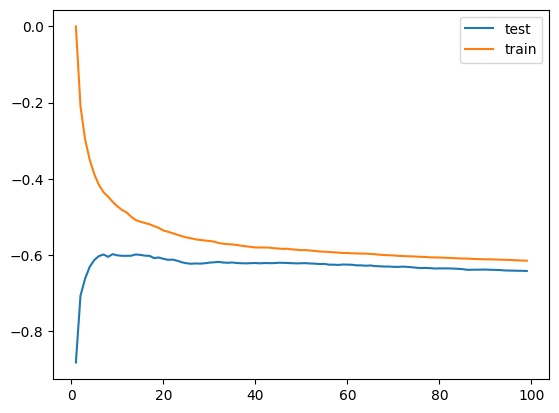

In [18]:
cv_result = pd.DataFrame(knnCV.cv_results_)
plt.plot(neighbors, cv_result.mean_test_score, label = 'test')
plt.plot(neighbors, cv_result.mean_train_score, label = 'train')
plt.legend()

## Decision Trees(CART)

Next, we consider Decision trees. We need to load the appropriate functions and define the tuning parameters. Unfortunately, unlike LASSO, Ridge and Logistic, there is no built in method CV for DecisionTrees, so we have to code it ourselves (with the help of `GridSearchCV`.  

In [19]:
from sklearn.tree import DecisionTreeRegressor

Create an instance of a decision tree regressor

In [20]:
dtree = DecisionTreeRegressor()

Remember that the tuning parameter of a decision tree relates to the complexity of the tree. In other words, it relates to how large the tree should be. 
We will tune the `min_samples_split`, which controls the minimum number of observations required so that a split can be made (no split that splits more than `min_samples_split` is made.

In [21]:
splits = [1.0, 0.75, 0.5, 0.4, 0.25, 0.20, 0.15, 0.10, 0.05, 0.01]

Do a gridsearch over all possible splits on our grid, using 5-fold cross validation. _Hint_: we will need `GridSearchCV` again.

In [22]:
param = {'min_samples_split': splits}
dtreeCV = GridSearchCV(estimator = dtree,
                       param_grid = param,
                       scoring = "neg_mean_squared_error",
                       return_train_score = True)

Fit the model.

In [23]:
dtreeCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': [1.0, 0.75, 0.5, 0.4, 0.25, 0.2,
                                               0.15, 0.1, 0.05, 0.01]},
             return_train_score=True, scoring='neg_mean_squared_error')

What is the optimal value for `min_sample_split`?

In [24]:
print('The best estimater uses %s splits' % dtreeCV.best_estimator_.min_samples_split )

The best estimater uses 0.75 splits


Lets look at the plot of the tuning parameter (splits) against the score. 
_Hint_: you may want to check the attribute `.cv_results_` from our fitted instance. It may also be useful to convert it into a pd.DataFrame.

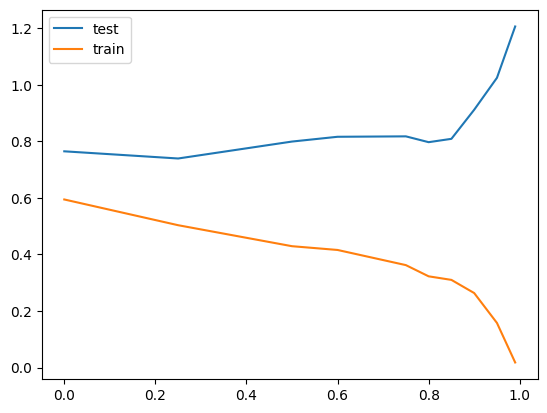

In [25]:
cv_result = pd.DataFrame(dtreeCV.cv_results_)
plt.plot(1-np.array(splits), -cv_result.mean_test_score, label = 'test')
plt.plot(1-np.array(splits), -cv_result.mean_train_score, label = 'train')
plt.legend()

As expected, test accuracy is much worse than train accuracy, and very complex models do well in sample, but perform very poorly out-of-sample.

Next, lets see the _feature importance_ of our features. _Hint:_ Inspect the attributes of `.best_estimator_`. We want to report the feature importances scaled by the maximal importance and in decreasing order. What is the most important feature in our selected tree?

In [26]:

features = dtreeCV.best_estimator_.feature_importances_
features = features/features.max()
features = pd.Series(features, index = X_train.columns)
features.sort_values(ascending = False)

TB6SMFFM         1.0
RPI              0.0
EXSZUSx          0.0
AAAFFM           0.0
T10YFFM          0.0
                ... 
DMANEMP          0.0
MANEMP           0.0
USCONS           0.0
CES1021000001    0.0
VIXCLSx          0.0
Length: 123, dtype: float64

Finally, plot the decision tree.

[Text(0.5, 0.75, 'TB6SMFFM <= -0.406\nsquared_error = 0.696\nsamples = 489\nvalue = 0.082'),
 Text(0.25, 0.25, 'squared_error = 0.647\nsamples = 143\nvalue = -0.356'),
 Text(0.75, 0.25, 'squared_error = 0.605\nsamples = 346\nvalue = 0.262')]

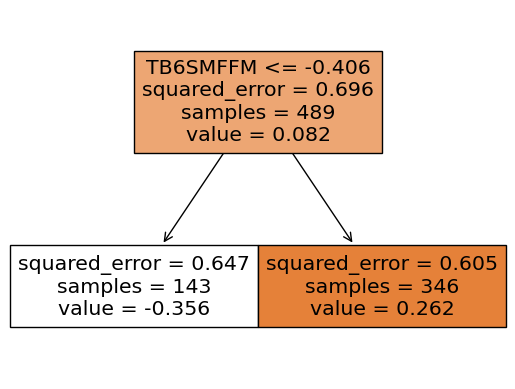

In [27]:
from sklearn.tree import plot_tree
plot_tree(dtreeCV.best_estimator_,
          feature_names=X_train.columns, 
          filled=True)

## Random Forests

We next consider Random Forests to forecast our target. Lets grow 100 trees, and tune the `max_features` parameter. Recall that this parameter controls the number of  features considered at each split, and as such, the correlation across trees.


In [28]:
from sklearn.ensemble import RandomForestRegressor

We will consider the following `max_features` values:

In [1]:
max_features = [5, 10, 20, 30, 40, 60, 80, 100]

Next, set up the `GridSearchCV`, just as we have been doing

In [29]:
# we fix 100 trees to grow
rf = RandomForestRegressor(n_estimators = 100)

parameters = {'max_features': max_features}
rfCV = GridSearchCV(rf,
                    parameters,
                    cv = 10,
                    verbose = 1,
                    return_train_score = True,
                    refit = True,
                    scoring = 'neg_mean_squared_error')

Fit the estimator

In [32]:
rfCV.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': [5, 10, 20, 30, 40, 60, 80, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

What is the number of `max_features` chosen for the best estimator? 

In [33]:
print('The best estimator chooses from %s features at each split' % rfCV.best_estimator_.max_features)

The best estimator chooses from 60 features at each split


Proceed analogously to the Descision Trees case by plotting the `max_features` against the scores. _Hint_ `cv_results_.mean_test_scores`.

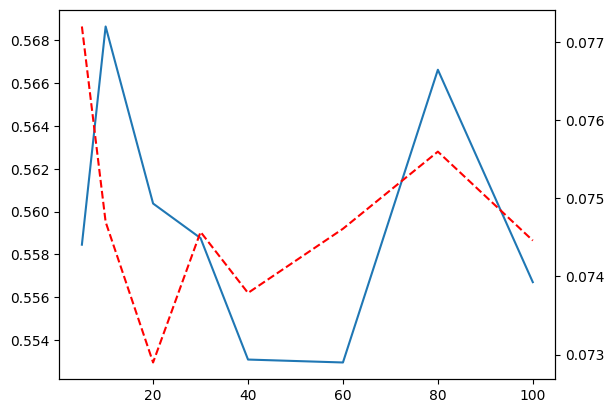

In [40]:
cv_result = pd.DataFrame(rfCV.cv_results_)

# plotting
fig, ax = plt.subplots()
ax.plot(max_features, -cv_result.mean_test_score)
ax1 = ax.twinx()
ax1.plot(max_features, -cv_result.mean_train_score, 'r--')

Next, lets visualize feature importance again. As before, make sure to scale by the most important feature and report them in decreasing order. What is the most imortant feature for Random Forests?

In [41]:
importance = rfCV.best_estimator_.feature_importances_
features = X_train.columns
important_features = pd.Series(data = importance/importance.max(),
                               index = features)
important_features.sort_values(ascending = False).head(10)

IPDCONGD     1.000000
IPDMAT       0.902215
IPMANSICS    0.721041
TB6SMFFM     0.686850
IPMAT        0.686247
MANEMP       0.645032
USGOOD       0.489181
IPNMAT       0.479859
HWIURATIO    0.456723
TB3SMFFM     0.411519
dtype: float64

## Gradient Boosting

Lets try a few flavours of gradient boosting machines. Recall that an important tuning parameter(although not the only one) for Gradient Boosting is the learning rate. Lets use the following values.

### Standard GBM

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
learning = [0.01, 0.05, 0.2, 0.3, 0.4, 0.5, 0.9]

Then, set up the grid search. As before, read the docs to make sure you know what is happening. In particular, we may want to set `return_train_score` to True.

In [52]:
gbm = GradientBoostingRegressor(n_estimators = 100)
parameters = {'learning_rate': learning}
gbmCV = GridSearchCV(gbm,
                     parameters, 
                     cv = 5,
                     verbose = 1,
                     return_train_score = True,
                     refit = True,
                     scoring = 'neg_mean_squared_error')

Fit the model.

In [53]:
gbmCV.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.2, 0.3, 0.4, 0.5,
                                           0.9]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

What is the learning rate for the best estimator?


In [54]:
print('The best learning rate is %s' % gbmCV.best_estimator_.learning_rate)

The best learning rate is 0.05


Lets see the usual plot of tuning parameter and scores. Recall that we are interested in `.cv_result_`.

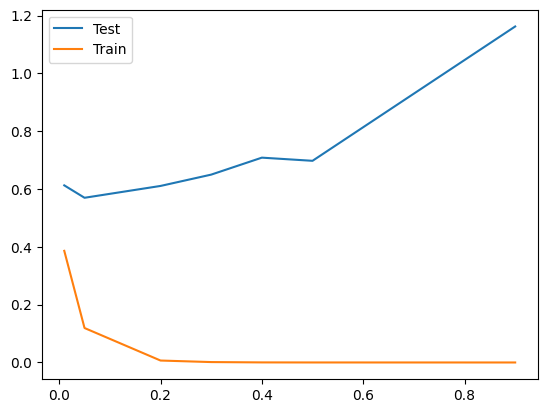

In [59]:
cv_results = pd.DataFrame(gbmCV.cv_results_)
plt.plot(learning, -cv_results.mean_test_score, label = 'Test')
plt.plot(learning, -cv_results.mean_train_score, label = 'Train')
plt.legend()

In [60]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.250971,0.386174,0.004670,0.003955,0.01,{'learning_rate': 0.01},-1.273158,-0.701737,-0.625993,-0.226244,...,-0.612785,0.383396,3,-3.021698e-01,-3.786159e-01,-3.863346e-01,-4.376600e-01,-4.263690e-01,-3.862299e-01,4.770805e-02
1,1.311604,0.453183,0.004588,0.002148,0.05,{'learning_rate': 0.05},-1.183802,-0.651566,-0.545644,-0.201298,...,-0.569837,0.349807,1,-9.406509e-02,-1.151939e-01,-1.073755e-01,-1.423285e-01,-1.371641e-01,-1.192254e-01,1.813980e-02
2,1.047667,0.218032,0.002395,0.002937,0.2,{'learning_rate': 0.2},-1.191927,-0.746508,-0.560677,-0.255141,...,-0.610780,0.341159,2,-5.718109e-03,-4.847463e-03,-6.883336e-03,-8.156875e-03,-7.964497e-03,-6.714056e-03,1.276720e-03
3,0.921672,0.029756,0.001335,0.001326,0.3,{'learning_rate': 0.3},-1.148550,-0.785703,-0.722049,-0.303542,...,-0.649949,0.323067,4,-1.204021e-03,-9.247015e-04,-1.023305e-03,-1.714539e-03,-2.127479e-03,-1.398809e-03,4.548337e-04
4,1.012883,0.103742,0.002218,0.001216,0.4,{'learning_rate': 0.4},-1.312159,-0.897069,-0.730547,-0.274195,...,-0.708666,0.382836,6,-1.514498e-04,-2.810637e-04,-1.916489e-04,-3.078889e-04,-3.299414e-04,-2.523985e-04,6.898542e-05
5,1.019981,0.140841,0.001504,0.001469,0.5,{'learning_rate': 0.5},-1.245833,-0.848821,-0.748518,-0.302412,...,-0.697724,0.348686,5,-5.114735e-05,-4.547646e-05,-5.983312e-05,-3.725704e-05,-7.782376e-05,-5.430755e-05,1.387256e-05
6,1.542822,0.296576,0.004862,0.004670,0.9,{'learning_rate': 0.9},-2.016298,-1.598416,-1.243444,-0.447581,...,-1.162497,0.611010,7,-4.890036e-07,-4.694297e-07,-3.589156e-07,-5.444058e-07,-3.978492e-07,-4.519208e-07,6.604374e-08


Same as usual: learning rate can be thought of as (the inverse) of shrinkage: a smaller learning rate implies a lot of shrinkage (and hence smaller model complexity and training set performance). In contrast, gbm with no shrinkage performs very well on the training set, but overfits on the test.

Finally, lets take a look at feature importance in our gbm. Remember: scale by the maximum and show them decreasing. What is the most important feature?

In [61]:
importance = gbmCV.best_estimator_.feature_importances_
features = X_train.columns
important_features = pd.Series(data = importance/importance.max(),
                               index = features)
important_features.sort_values(ascending = False).head(10)

IPDCONGD     1.000000
TB6SMFFM     0.859474
HWIURATIO    0.618648
IPMAT        0.609174
PERMITW      0.559329
IPMANSICS    0.544544
CLAIMSx      0.408407
AMDMUOx      0.355731
MANEMP       0.335319
IPDMAT       0.300944
dtype: float64

## XGBoost

Lets try XGBoost now.

In [62]:
from xgboost import XGBRegressor

We will again tune the learning rate, although we could have explored other tuning parameters as well. Set up the GridSearchCV. **Note**: to aviod a warning, create the XGBRegressor instance with `objective` set to `'reg:squarederror'`

In [63]:
xgb = XGBRegressor(n_estimators = 100,
                   objective = 'reg:squarederror')

parameters = {'learning_rate': learning}

xgbCV = GridSearchCV(xgb,
                     parameters,
                     cv = 5,
                     verbose = 0,
                     return_train_score = True,
                     refit = True,
                     scoring = 'neg_mean_squared_error')

fit the model

In [64]:
xgbCV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.2, 0.3, 0.4, 0.5,
                                           0.9]},
             return_train_score=True, scoring='neg_mean_squared_error')

What is the best learning rate of the best xgb estimator?


In [67]:
print('The best learning rate for xgb estimator is %s' % xgbCV.best_estimator_.learning_rate)

The best learning rate for xgb estimator is 0.05


Lets visualize our result by standard plot of tuning parameters and scores

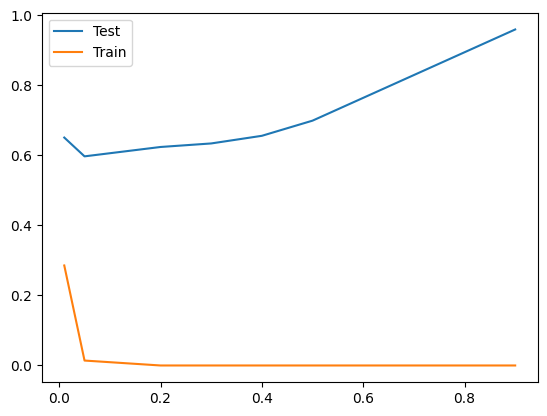

In [72]:
cv_results = pd.Series(xgbCV.cv_results_)
plt.plot(learning, -cv_results.mean_test_score, label = 'Test')
plt.plot(learning, -cv_results.mean_train_score, label = 'Train')
plt.legend()

Show the feature importance

In [74]:
impportance = xgbCV.best_estimator_.feature_importances_
features = X_train.columns
important_features = pd.Series(data = importance/importance.max(),
                               index = features)
important_features.sort_values(ascending = False).head(10)

IPDCONGD     1.000000
TB6SMFFM     0.859474
HWIURATIO    0.618648
IPMAT        0.609174
PERMITW      0.559329
IPMANSICS    0.544544
CLAIMSx      0.408407
AMDMUOx      0.355731
MANEMP       0.335319
IPDMAT       0.300944
dtype: float64

## AdaBoost

Finally, lets look at AdaBoost. Again, we will tune the learning rate.

In [76]:
from sklearn.ensemble import AdaBoostRegressor

Set up the GradSearch

In [78]:
ab = AdaBoostRegressor(n_estimators = 100)
parameters = {'learning_rate': learning}
abCV = GridSearchCV(ab,
                    parameters,
                    return_train_score = True,
                    scoring = 'neg_mean_squared_error')

Lets fit the model

In [79]:
abCV.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(n_estimators=100),
             param_grid={'learning_rate': [0.01, 0.05, 0.2, 0.3, 0.4, 0.5,
                                           0.9]},
             return_train_score=True, scoring='neg_mean_squared_error')

What is the learning rate of the best estimator?

In [80]:
print('The best learning rate is %s' % abCV.best_estimator_.learning_rate)

The best learning rate is 0.4


And lets plot the learning rate versus the loss for both the training set and the test set.

Text(0, 0.5, 'Train')

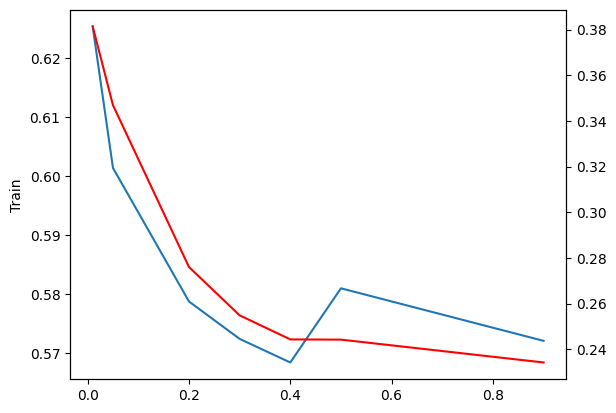

In [89]:
cv_results = pd.Series(abCV.cv_results_)

fig, ax = plt.subplots()
ax.plot(learning, -cv_results.mean_test_score)
ax.set_ylabel('Test')

ax1 = ax.twinx()
ax1.plot(learning, -cv_results.mean_train_score, 'r-')
ax.set_ylabel('Train')



And feature importance, just as before

In [90]:
importance = abCV.best_estimator_.feature_importances_
features = X_train.columns
important_features = pd.Series(importance/importance.max(),
                               index = features)

important_features.sort_values(ascending = False).head(10)

IPDCONGD         1.000000
CLAIMSx          0.810454
IPMAT            0.639004
HWIURATIO        0.635520
BUSINVx          0.420882
IPMANSICS        0.326124
TB3SMFFM         0.300588
CES1021000001    0.299127
AMDMUOx          0.246845
BAA              0.234767
dtype: float64

## Out-of-sample forecasting

lets now construct our forecasts. There are many smarter and more efficient ways of doing this, but lets take it one step at a time.

In [91]:
forecasts['naive'] = naive_forcaster(y_train)
forecast_err['naive'] = (y_test - forecasts['naive'])**2

forecasts['kNN'] = knnCV.best_estimator_.predict(X_test)
forecast_err['kNN'] = (y_test - forecasts['kNN'])**2

forecasts['Dtree'] = dtreeCV.best_estimator_.predict(X_test)
forecast_err['Dtree'] = (y_test - forecasts['Dtree'])**2

forecasts['RF'] = rfCV.best_estimator_.predict(X_test)
forecast_err['RF'] = (y_test - forecasts['RF'])**2
np.sqrt( forecast_err.RF.mean() )

forecasts['GB'] = gbmCV.best_estimator_.predict(X_test)
forecast_err['GB'] = (y_test - forecasts['GB'])**2

forecasts['XGB'] = xgbCV.best_estimator_.predict(X_test)
forecast_err['XGB'] = (y_test - forecasts['XGB'])**2

forecasts['AdaB'] = abCV.best_estimator_.predict(X_test)
forecast_err['AdaB'] = (y_test - forecasts['AdaB'])**2

And compute our MSE:

In [92]:
MSE = pd.DataFrame(forecast_err.mean(axis = 0), columns = ['MSE']).transpose()
MSE

,naive,kNN,Dtree,RF,GB,XGB,AdaB
MSE,1.581787,1.421853,1.671119,1.503498,1.578401,1.562527,1.464438
